In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [2]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df = df [['Make',
            'Model',
            'Year',
            'Engine HP',
            'Engine Cylinders',
            'Transmission Type',
            'Vehicle Style',
            'highway MPG',
            'city mpg',
            'MSRP']]

In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [6]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [7]:
df = df.fillna(0)

In [8]:
missing_cols = df.columns[df.isnull().any()].tolist()
print(missing_cols)

[]


In [9]:
df.rename(columns={'msrp': 'price'}, inplace=True, errors='raise')
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [10]:
df['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [11]:
useful_features = [col for col in df.columns if col not in ['price']]
categorical = [col for col in useful_features if df[col].dtype == 'object']
numerical = [col for col in useful_features if col not in categorical]

<Axes: >

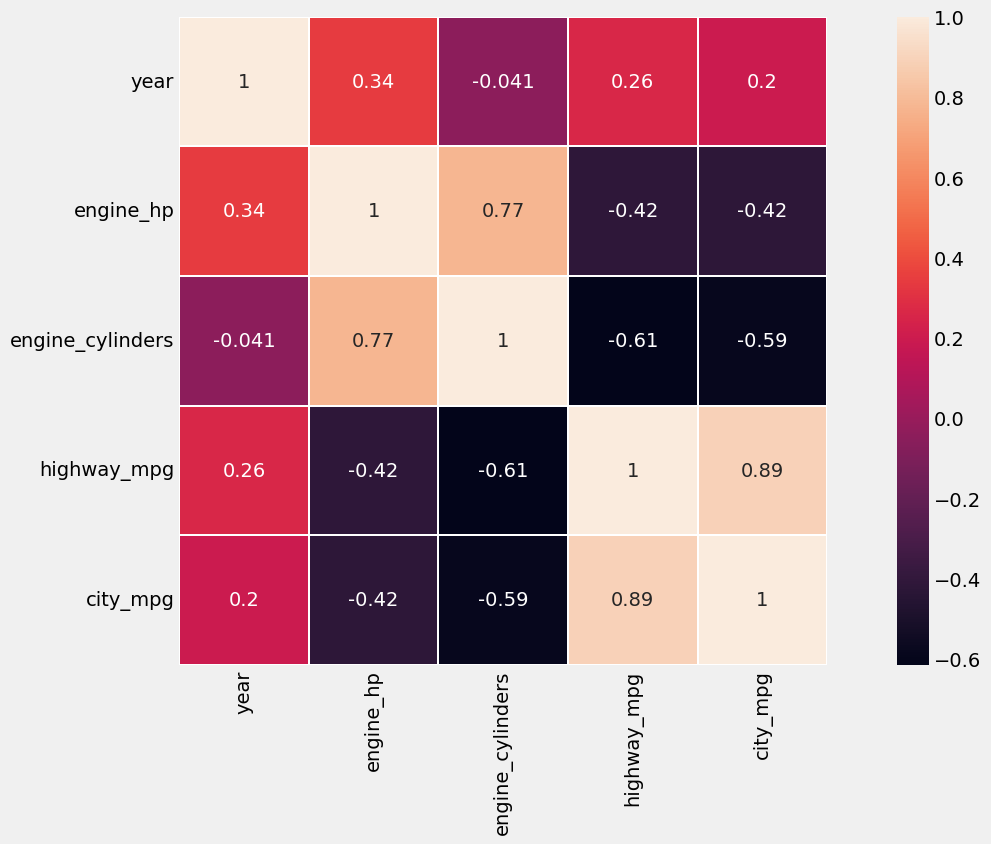

In [12]:
sns.heatmap(df[numerical].corr(), square = True, annot = True, lw = 0.2)

In [13]:
df_lr = df.copy()
avg_price = df['price'].mean()
df['above_average'] = (df.price >= avg_price).astype(int)

In [14]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [15]:
avg_price

40594.737032063116

In [16]:
del df['price']

# Making full_train and test set
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Next making train and validation set from full_train set
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Print the proportions of the 3 datasets to the original df
print(f"Proportion of train set: {len(df_train)/len(df)}")
print(f"Proportion of validation set: {len(df_val)/len(df)}")
print(f"Proportion of test set: {len(df_test)/len(df)}")

Proportion of train set: 0.5999664260533826
Proportion of validation set: 0.2000167869733087
Proportion of test set: 0.2000167869733087


In [17]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [18]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_train["above_average"])

mi = df_train[categorical].apply(mutual_info_churn_score)
mi = mi.round(2)
mi.sort_values(ascending = False).to_frame().reset_index().rename({'index': 'Variables', 0: 'Improtance'}, axis = 1).style.background_gradient('crest')

,Variables,Improtance
0,model,0.460000
1,make,0.240000
2,vehicle_style,0.080000
3,transmission_type,0.020000


In [19]:
# Dropping indexes of these datasets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Creating Dependent Variables
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

# Deleting target column i.e. above_average from training datasets
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [20]:
dv = DictVectorizer(sparse=False)                              

train_dict = df_train[useful_features].to_dict(orient='records') 
X_train = dv.fit_transform(train_dict)

val_dict = df_val[useful_features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [21]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [22]:
y_pred = model.predict_proba(X_val)[:, 1]

above_average_decision = (y_pred >= 0.5)

round((y_val == above_average_decision).mean(), 2)

0.93

In [23]:
def train_without_feature(feature):
    df_train_w = df_train[useful_features].copy()
    df_val_w = df_val[useful_features].copy()
    del df_train_w[feature]
    del df_val_w[feature]
    dv = DictVectorizer(sparse=False)                              
    train_dict = df_train_w.to_dict(orient='records') 
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val_w.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    above_average_decision = (y_pred >= 0.5)
    return (feature, 
            round((y_val == above_average_decision).mean(), 2), 
            abs(0.93 - round((y_val == above_average_decision).mean(), 2)))

In [24]:
for feature in useful_features:
    print(train_without_feature(feature))

('make', 0.95, 0.019999999999999907)
('model', 0.92, 0.010000000000000009)
('year', 0.95, 0.019999999999999907)
('engine_hp', 0.93, 0.0)
('engine_cylinders', 0.95, 0.019999999999999907)
('transmission_type', 0.95, 0.019999999999999907)
('vehicle_style', 0.93, 0.0)
('highway_mpg', 0.95, 0.019999999999999907)
('city_mpg', 0.95, 0.019999999999999907)


In [25]:
# Making full_train and test set
df_full_train, df_test = train_test_split(df_lr, test_size=0.2, random_state=42)

# Next making train and validation set from full_train set
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Print the proportions of the 3 datasets to the original df
print(f"Proportion of train set: {len(df_train)/len(df_lr)}")
print(f"Proportion of validation set: {len(df_val)/len(df_lr)}")
print(f"Proportion of test set: {len(df_test)/len(df_lr)}")

# Dropping indexes of these datasets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Creating Dependent Variables
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

# Apply the logarithmic transformation to price
y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

# Deleting target column i.e. above_average from training datasets
del df_train['price']
del df_val['price']
del df_test['price']

def train_lr_alpha(alpha):
    dv = DictVectorizer(sparse=False)                              
    train_dict = df_train.to_dict(orient='records') 
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse = round(rmse, 3)
    return (alpha, rmse)

for alpha in [0, 0.01, 0.1, 1, 10]:
    print(train_lr_alpha(alpha))

Proportion of train set: 0.5999664260533826
Proportion of validation set: 0.2000167869733087
Proportion of test set: 0.2000167869733087


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(0, 0.487)


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(0.01, 0.487)


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(0.1, 0.487)


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1, 0.487)
(10, 0.487)


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
df_val.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Volkswagen,Beetle,2015,210.0,4.0,MANUAL,2dr Hatchback,31,23
1,Audi,SQ5,2015,354.0,6.0,AUTOMATIC,4dr SUV,24,17
2,Pontiac,Grand Am,2005,140.0,4.0,AUTOMATIC,Sedan,31,22
3,Nissan,350Z,2009,306.0,6.0,MANUAL,Convertible,24,17
4,Ford,E-150,1996,199.0,6.0,AUTOMATIC,Passenger Van,15,11
